In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn as sk
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn import tree, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

loading the given data

In [2]:
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']
df = pd.read_csv('Maternal Health Risk Data Set.csv', header = None, names = columns)
df.drop(index=df.index[0], axis=0, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,25,130,80,15,98,86,high risk
2,35,140,90,13,98,70,high risk
3,29,90,70,8,100,80,high risk
4,30,140,85,7,98,70,high risk
5,35,120,60,6.1,98,76,low risk


turning categorical data to numerical

In [3]:
df["RiskLevel"].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [4]:
newVals = {"RiskLevel": {"low risk": 0, "mid risk": 1, "high risk" : 2}}
df = df.replace(newVals)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,25,130,80,15,98,86,2
2,35,140,90,13,98,70,2
3,29,90,70,8,100,80,2
4,30,140,85,7,98,70,2
5,35,120,60,6.1,98,76,0


checking to see if all columns are numeric 

In [5]:
dataTypes = df.dtypes
print(dataTypes)

Age            object
SystolicBP     object
DiastolicBP    object
BS             object
BodyTemp       object
HeartRate      object
RiskLevel       int64
dtype: object


we need to convert objects into numeric data

In [6]:
df["Age"] = df["Age"].astype(str).astype(int)
df["SystolicBP"] = df["SystolicBP"].astype(str).astype(int)
df["DiastolicBP"] = df["DiastolicBP"].astype(str).astype(int)
df["BS"] = df["BS"].astype(str).astype(float)
df["BodyTemp"] = df["BodyTemp"].astype(str).astype(float)
df["HeartRate"] = df["HeartRate"].astype(str).astype(int)

In [7]:
dataTypes = df.dtypes
print(dataTypes)

Age              int32
SystolicBP       int32
DiastolicBP      int32
BS             float64
BodyTemp       float64
HeartRate        int32
RiskLevel        int64
dtype: object


now we preprocess the given data

first we check to see if there are any missing values

In [8]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

shuffling the data and choosing 30 percent of them for training

In [9]:
y = df["RiskLevel"]
X = df[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

dealing with the outliers

In [12]:
y_train = y_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
X_train = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]

VIF or Variance Inflation Factor allows you to determine the strength of the correlation between the various independent variables. It is calculated by taking a variable and regressing it against every other variables.

    1 — features are not correlated
    1<VIF<5 — features are moderately correlated
    VIF>5 — features are highly correlated
    VIF>10 — high correlation between features and is cause for concern

In [13]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [14]:
calculate_vif(df=df, features=df.columns[:])

,VIF,Tolerance
Age,1.445822,0.691648
SystolicBP,2.924430,0.341947
DiastolicBP,2.731886,0.366047
BS,1.855329,0.538988
BodyTemp,1.280715,0.780814
HeartRate,1.069154,0.935319
RiskLevel,1.797230,0.556412


In [15]:
calculate_vif(df=df, features=[#"Age", 
                               "SystolicBP", 
                               "DiastolicBP", 
                               "BS", 
                               "BodyTemp", 
                               "HeartRate", 
                               "RiskLevel"])

,VIF,Tolerance
SystolicBP,2.890218,0.345995
DiastolicBP,2.718681,0.367825
BS,1.677706,0.596052
BodyTemp,1.246512,0.802239
HeartRate,1.064741,0.939195
RiskLevel,1.797016,0.556478


In [16]:
calculate_vif(df=df, features=["Age", 
                               "SystolicBP", 
                               "DiastolicBP", 
                               "BS", 
                               #"BodyTemp", 
                               "HeartRate", 
                               "RiskLevel"])

,VIF,Tolerance
Age,1.407210,0.710626
SystolicBP,2.826182,0.353834
DiastolicBP,2.727448,0.366643
BS,1.839906,0.543506
HeartRate,1.066846,0.937343
RiskLevel,1.597510,0.625974


In [17]:
calculate_vif(df=df, features=[#"Age", 
                               "SystolicBP", 
                               "DiastolicBP", 
                               "BS", 
                               "BodyTemp", 
                               #"HeartRate", 
                               "RiskLevel"])

,VIF,Tolerance
SystolicBP,2.888372,0.346216
DiastolicBP,2.705285,0.369647
BS,1.665060,0.600579
BodyTemp,1.244848,0.803311
RiskLevel,1.762091,0.567508


As you see we need all columns because by deleting even one of them the correlation of RiskLevel decreases

now we need to normalize the dataset using standard scaler

In [18]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

We are done with the preprocessing! time to train

### Decision Tree

In [19]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=40)
res = cross_val_score(clf, X_train, y_train).mean()
print('accuracy:', res.mean())

accuracy: 0.8321167883211679


In [20]:
rand_ls = [0, 0, 42, 42]
depth_ls = [10, 20, 20, 40]
acc_ls = [0.77, 0.83, 0.83, 0.83]

vdf_lab = {"random state": rand_ls, "max depth": depth_ls, "accuracy": acc_ls}
vdf = pd.DataFrame(vdf_lab)
vdf

,random state,max depth,accuracy
0,0,10,0.77
1,0,20,0.83
2,42,20,0.83
3,42,40,0.83


In [21]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train) #train set prediction
accuracy_score(y_train, y_predict)

0.945985401459854

In [22]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test) #test set prediction
accuracy_score(y_test, y_predict)

0.7737704918032787

confusion matrix

In [23]:
confusion_matrix(y_test, y_predict)

array([[87, 24,  6],
       [19, 84,  9],
       [ 2,  9, 65]], dtype=int64)

### KNN

In [24]:
clf = KNeighborsClassifier(n_neighbors=1)
res = cross_val_score(clf, X_train, y_train).mean()
print('accuracy:', res.mean())

accuracy: 0.7897810218978102


In [25]:
nbrs = [1, 2, 10, 100]
acc_ls = [0.78, 0.71, 0.66, 0.58]

vdf_lab = {"neighbors": nbrs, "accuracy": acc_ls}
vdf = pd.DataFrame(vdf_lab)
vdf

,neighbors,accuracy
0,1,0.78
1,2,0.71
2,10,0.66
3,100,0.58


In [26]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train) #train set prediction
accuracy_score(y_train, y_predict)

0.9051094890510949

In [27]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test) #test set prediction
accuracy_score(y_test, y_predict)

0.7737704918032787

In [28]:
confusion_matrix(y_test, y_predict)

array([[92, 22,  3],
       [25, 82,  5],
       [ 9,  5, 62]], dtype=int64)

### SVM

In [29]:
clf = svm.SVC(kernel='poly', degree=5, C=60)
res = cross_val_score(clf, X_train, y_train).mean()
print('accuracy:', res.mean())

accuracy: 0.7313868613138687


In [30]:
krnl = ["linear", "poly", "poly", "rbf", "sigmoid"]
dgree = [1, 1, 5, 1, 1]
c = [1, 1, 60, 1, 1]
acc_ls = [0.63, 0.62, 0.73, 0.70, 0.54]

vdf_lab = {"kernel": krnl, "degree": dgree, "C": c, "accuracy": acc_ls}
vdf = pd.DataFrame(vdf_lab)
vdf

,kernel,degree,C,accuracy
0,linear,1,1,0.63
1,poly,1,1,0.62
2,poly,5,60,0.73
3,rbf,1,1,0.70
4,sigmoid,1,1,0.54


In [31]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train) #train set prediction
accuracy_score(y_train, y_predict)

0.8116788321167884

In [32]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test) #test set prediction
accuracy_score(y_test, y_predict)

0.639344262295082

In [33]:
confusion_matrix(y_test, y_predict)

array([[97, 16,  4],
       [56, 49,  7],
       [16, 11, 49]], dtype=int64)

### Random Forest

In [34]:
clf = RandomForestClassifier(random_state=42, max_depth=20)
res = cross_val_score(clf, X_train, y_train).mean()
print('accuracy:', res.mean())

accuracy: 0.8496350364963503


In [35]:
rand_ls = [0, 0, 42, 42]
depth_ls = [10, 20, 20, 40]
acc_ls = [0.83, 0.84, 0.84, 0.84]

vdf_lab = {"random state": rand_ls, "max depth": depth_ls, "accuracy": acc_ls}
vdf = pd.DataFrame(vdf_lab)
vdf

,random state,max depth,accuracy
0,0,10,0.83
1,0,20,0.84
2,42,20,0.84
3,42,40,0.84


In [36]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train) #train set prediction
accuracy_score(y_train, y_predict)

0.945985401459854

In [37]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test) #test set prediction
accuracy_score(y_test, y_predict)

0.7770491803278688

In [38]:
confusion_matrix(y_test, y_predict)

array([[90, 23,  4],
       [18, 85,  9],
       [ 5,  9, 62]], dtype=int64)

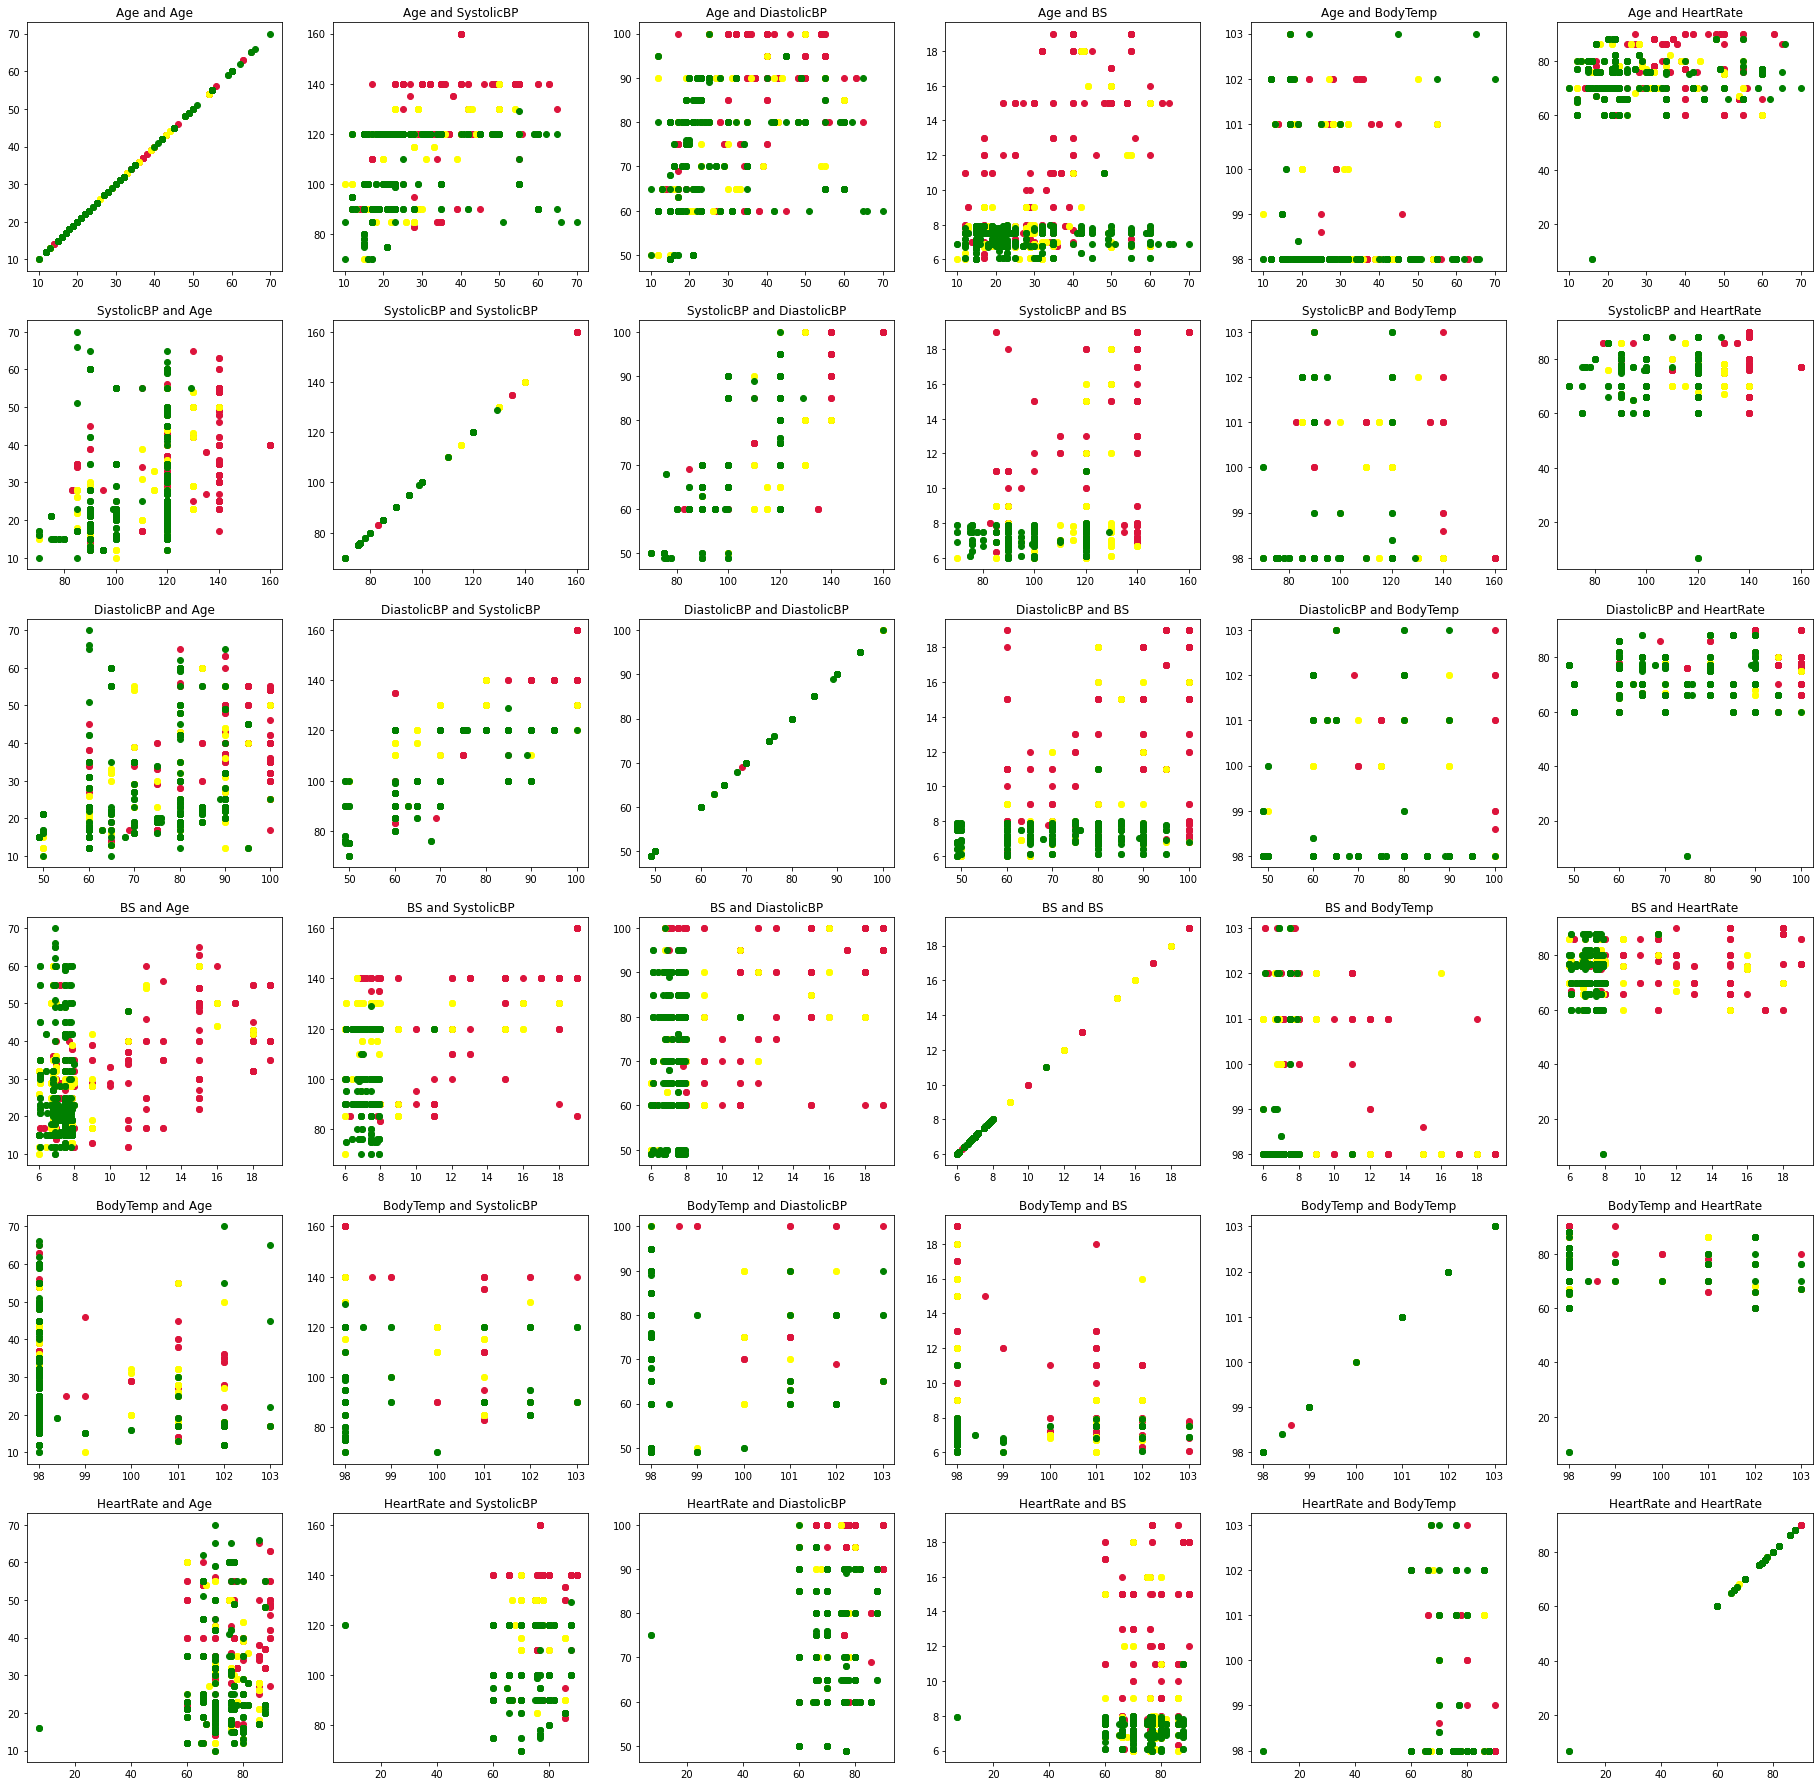

In [39]:
data = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
n = len(data)

fig, ax = plt.subplots(n, n, figsize=(32, 32))

for i in range(n):
    
    for j in range(n):
        
        s = ''
        s = str(data[i]) + " and " + str(data[j])
        
        ax[i, j].scatter(x = df[data[i]][df['RiskLevel'] == 2], y = df[data[j]][df['RiskLevel'] == 2], c = 'crimson')
        ax[i, j].scatter(x = df[data[i]][df['RiskLevel'] == 1], y = df[data[j]][df['RiskLevel'] == 1], c = 'yellow')
        ax[i, j].scatter(x = df[data[i]][df['RiskLevel'] == 0], y = df[data[j]][df['RiskLevel'] == 0], c = 'green')
        ax[i, j].set_title(s)

important features are age and bs and bp and heart rate and bs

In [40]:
lab = ["Decision Tree", "KNN", "SVM", "Random Forest"]
acc_ls = [0.83, 0.78, 0.73, 0.84]

vdf_lab = {"model": lab, "accuracy": acc_ls}
vdf = pd.DataFrame(vdf_lab)
vdf

,model,accuracy
0,Decision Tree,0.83
1,KNN,0.78
2,SVM,0.73
3,Random Forest,0.84


Random Forest has the best result